# Пример 1

импорт необходимых пакетов:

In [16]:
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns; sns.set()
import numpy as np
from sklearn.cluster import KMeans

Генерируем четыре 2D капли:

In [17]:
from sklearn.datasets import make_blobs
X, y_true = make_blobs(n_samples = 400, centers = 4, cluster_std = 0.60, random_state = 0)

визуализация данных 

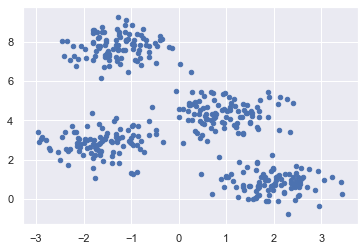

In [18]:
plt.scatter(X[:, 0], X[:, 1], s = 20);
plt.show()

создаем объект KMeans вместе с указанием количества кластеров, обучаем модель и делаем прогноз:

In [19]:
kmeans = KMeans(n_clusters = 4)
kmeans.fit(X)
y_kmeans = kmeans.predict(X)

строим и визуализируем центры кластеров, выбранные с помощью k-средних оценки Python

In [21]:
from sklearn.datasets.samples_generator import make_blobs
X, y_true = make_blobs(n_samples = 400, centers = 4, cluster_std = 0.60, random_state = 0)

визуализируем набор данных 

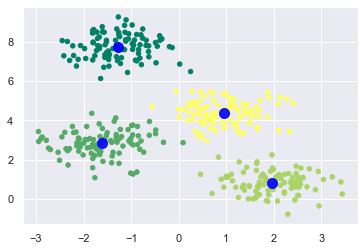

In [22]:
plt.scatter(X[:, 0], X[:, 1], c = y_kmeans, s = 20, cmap = 'summer')
centers = kmeans.cluster_centers_
plt.scatter(centers[:, 0], centers[:, 1], c = 'blue', s = 100, alpha = 0.9);
plt.show()

# Пример 2

Импорт необходимых пакетов:

In [12]:
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns; sns.set()
import numpy as np
from sklearn.cluster import KMeans

Загрузим набор цифр из sklearn и создадим из него объект. Набор данных имеет 1797 выборок с 64 признаками.

In [15]:
from sklearn.datasets import load_digits
digits = load_digits()
digits.data.shape
print(digits.data[0,:])

[ 0.  0.  5. 13.  9.  1.  0.  0.  0.  0. 13. 15. 10. 15.  5.  0.  0.  3.
 15.  2.  0. 11.  8.  0.  0.  4. 12.  0.  0.  8.  8.  0.  0.  5.  8.  0.
  0.  9.  8.  0.  0.  4. 11.  0.  1. 12.  7.  0.  0.  2. 14.  5. 10. 12.
  0.  0.  0.  0.  6. 13. 10.  0.  0.  0.]


Проведем кластеризацию как в примере выше:

In [14]:
kmeans = KMeans(n_clusters = 10, random_state = 0)
clusters = kmeans.fit_predict(digits.data)
kmeans.cluster_centers_.shape
#print(kmeans.cluster_centers_[0,:])

(10, 64)

K-means создал 10 кластеров с 64 функциями

В качестве результата мы получим следующее изображение, показывающее центры кластеров, изученные с помощью k-средних.

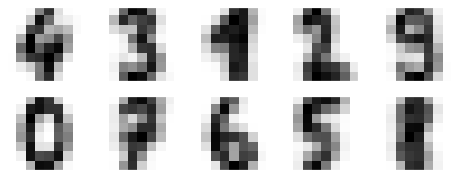

In [16]:
fig, ax = plt.subplots(2, 5, figsize=(8, 3))
centers = kmeans.cluster_centers_.reshape(10, 8, 8)
for axi, center in zip(ax.flat, centers):
    axi.set(xticks=[], yticks=[])
    axi.imshow(center, interpolation='nearest', cmap=plt.cm.binary)

Следующие строки кода будут сопоставлять изученные метки кластера с истинными метками, найденными в них:

In [17]:
from scipy.stats import mode
labels = np.zeros_like(clusters)
for i in range(10):
   mask = (clusters == i)
   labels[mask] = mode(digits.target[mask])[0]

Далее мы можем проверить точность следующим образом:

In [18]:
from sklearn.metrics import accuracy_score
accuracy_score(digits.target, labels)

0.7952142459654981

# Пример 3 

импорт необходимых пакетов:

In [23]:
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns; sns.set()
import numpy as np
import math
from random import seed
from random import randint


Генерируем 2D капли:

In [33]:
from sklearn.datasets import make_blobs
k = 6
n = 500
X, y_true = make_blobs(n_samples = n, centers = k, cluster_std = 0.80, random_state = 0)

визуализация данных 

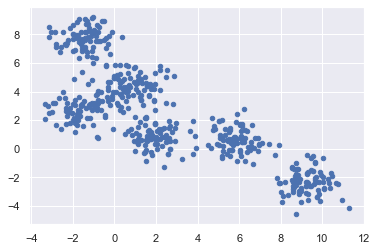

In [34]:
plt.scatter(X[:, 0], X[:, 1], s = 20);
plt.show()

In [35]:
delta = 0.001
l = 0
#k = 4
centers = [[0] * 2 for i in range(k)]
#n = 400
for i in range(k):
    num = randint(0, n)
    centers[i][0] = X[num, 0]
    centers[i][1] = X[num, 1]
    centers = np.array(centers)

Начальное расположение кластеров:

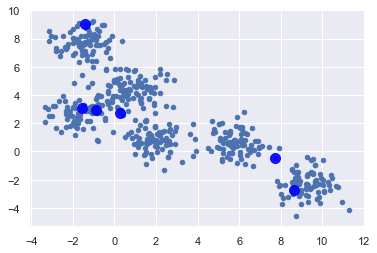

In [36]:
plt.scatter(X[:, 0], X[:, 1], s = 20)
plt.scatter(centers[:, 0], centers[:, 1], c = 'blue', s = 100, alpha = 0.9);
plt.show()

Переопределяем центры кластеров:

In [37]:
def Clust_Centers(x, part, n, k):
    c_new = [[0] * 2 for i in range(k)]
    count = [0]*k
    for i in range(n):
        for j in range(k):
            if part[i] == j:
                c_new[j][0] += x[i, 0]
                c_new[j][1] += x[i, 1]
                count[j] += 1
    for j in range(k):
        c_new[j][0] /= count[j]
        c_new[j][1] /= count[j]
    return np.array(c_new)
        
            
        

Перераспределяем вершины по новым кластерам:

In [38]:
def New_Partition(x, center, n, k):
    ans = []
    for i in range(n):
        Clust = 0
        mindist = Metrics(np.array([x[i,0], x[i,1]]), np.array([center[0,0], center[0, 1]]), 1)
        for j in range(1, k):
            dist = Metrics(np.array([x[i,0], x[i,1]]), np.array([center[j,0], center[j, 1]]), 1)
            if dist < mindist:
                    mindist = dist
                    Clust = j
        ans.append(Clust)
    return np.array(ans)
    
    

Высчитываем расстояние между двумя векторами по метрике:

In [30]:
def Metrics(x1, x2, n):
    ans = 0
    for i in range(n):
        if n > 1:
            ans += math.sqrt(pow(x1[i, 0] - x2[i, 0], 2) + pow(x1[i, 1] - x2[i, 1], 2))
        else:
            ans += math.sqrt(pow(x1[0] - x2[0], 2) + pow(x1[1] - x2[1], 2))
    return ans

In [39]:
delta1 = 1
while delta1 >= delta:
    l += 1
    partition = New_Partition(X, centers, n, k)
    centers_new = Clust_Centers(X, partition, n, k)
    delta1 = Metrics(centers, centers_new, k)
    centers = centers_new

Визуализация окончательного разбиения:

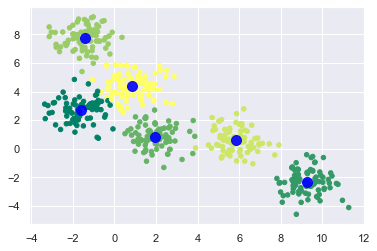

In [40]:
plt.scatter(X[:, 0], X[:, 1], c = partition, s = 20, cmap = 'summer')
plt.scatter(centers[:, 0], centers[:, 1], c = 'blue', s = 100, alpha = 0.9);
plt.show()

Сравним с предполагаемым(верным) разбиением:

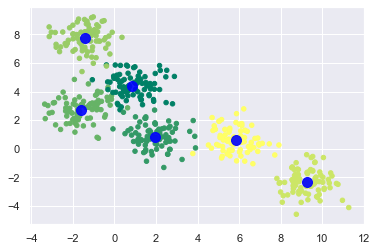

In [41]:
plt.scatter(X[:, 0], X[:, 1], c = y_true, s = 20, cmap = 'summer')
plt.scatter(centers[:, 0], centers[:, 1], c = 'blue', s = 100, alpha = 0.9);
plt.show()

Выводим количество проделанных циклов:

In [43]:
print(l)

8
